In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df_three_sensors = pd.read_csv('three_sensors.csv')
df_three_sensors

,SubjectID,Device,ActivityID,TrialNo,Fall,Mean Acc X,Std Acc X,Rng Acc X,Mean Acc Y,Std Acc Y,...,Rng Gyr Z,Mean Mag X,Std Mag X,Rng Mag X,Mean Mag Y,Std Mag Y,Rng Mag Y,Mean Mag Z,Std Mag Z,Rng Mag Z
0,1,Neck,13,1,No Fall,0.965650,0.056048,0.466528,0.965650,0.056048,...,124.46,0.246316,0.125829,0.49392,0.246316,0.125829,0.49392,0.246316,0.125829,0.49392
1,1,Neck,13,2,No Fall,0.966358,0.032715,0.320616,0.966358,0.032715,...,159.60,0.298555,0.040902,0.22750,0.298555,0.040902,0.22750,0.298555,0.040902,0.22750
2,1,Neck,13,3,No Fall,0.972429,0.061986,0.609756,0.972429,0.061986,...,184.38,0.065271,0.113632,0.34622,0.065271,0.113632,0.34622,0.065271,0.113632,0.34622
3,1,Neck,13,4,No Fall,0.967180,0.040855,0.436028,0.967180,0.040855,...,176.40,-0.004766,0.043955,0.27412,-0.004766,0.043955,0.27412,-0.004766,0.043955,0.27412
4,1,Neck,13,5,No Fall,0.959253,0.058024,0.545584,0.959253,0.058024,...,110.46,0.197626,0.113787,0.50876,0.197626,0.113787,0.50876,0.197626,0.113787,0.50876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,15,Waist,131,2,Fall,0.421164,0.482082,3.109536,0.421164,0.482082,...,385.91,0.584274,0.116918,0.92008,0.584274,0.116918,0.92008,0.584274,0.116918,0.92008
6601,15,Waist,132,1,Fall,0.477437,0.525878,12.972016,0.477437,0.525878,...,809.62,0.357015,0.124277,0.64218,0.357015,0.124277,0.64218,0.357015,0.124277,0.64218
6602,15,Waist,134,2,Fall,0.516297,0.416558,5.058364,0.516297,0.416558,...,400.89,0.370667,0.136420,0.78834,0.370667,0.136420,0.78834,0.370667,0.136420,0.78834
6603,15,Waist,135,1,Fall,0.838070,0.210071,4.985652,0.838070,0.210071,...,127.26,0.245743,0.167907,0.64596,0.245743,0.167907,0.64596,0.245743,0.167907,0.64596


In [3]:
from sklearn.model_selection import train_test_split

# Function to split the data into train and test
def split_data(df):
    X = df.drop(columns=['Fall'])
    y = df['Fall'] # Target class

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return x_train, x_test, y_train, y_test

In [4]:
df_three_sensors.drop(columns=['SubjectID', 'Device',	'ActivityID', 'TrialNo'], inplace=True)
df_three_sensors['Fall'] = df_three_sensors['Fall'].replace({'No Fall': 1, 'Fall': 0})
df_three_sensors

,Fall,Mean Acc X,Std Acc X,Rng Acc X,Mean Acc Y,Std Acc Y,Rng Acc Y,Mean Acc Z,Std Acc Z,Rng Acc Z,...,Rng Gyr Z,Mean Mag X,Std Mag X,Rng Mag X,Mean Mag Y,Std Mag Y,Rng Mag Y,Mean Mag Z,Std Mag Z,Rng Mag Z
0,1,0.965650,0.056048,0.466528,0.965650,0.056048,0.466528,0.965650,0.056048,0.466528,...,124.46,0.246316,0.125829,0.49392,0.246316,0.125829,0.49392,0.246316,0.125829,0.49392
1,1,0.966358,0.032715,0.320616,0.966358,0.032715,0.320616,0.966358,0.032715,0.320616,...,159.60,0.298555,0.040902,0.22750,0.298555,0.040902,0.22750,0.298555,0.040902,0.22750
2,1,0.972429,0.061986,0.609756,0.972429,0.061986,0.609756,0.972429,0.061986,0.609756,...,184.38,0.065271,0.113632,0.34622,0.065271,0.113632,0.34622,0.065271,0.113632,0.34622
3,1,0.967180,0.040855,0.436028,0.967180,0.040855,0.436028,0.967180,0.040855,0.436028,...,176.40,-0.004766,0.043955,0.27412,-0.004766,0.043955,0.27412,-0.004766,0.043955,0.27412
4,1,0.959253,0.058024,0.545584,0.959253,0.058024,0.545584,0.959253,0.058024,0.545584,...,110.46,0.197626,0.113787,0.50876,0.197626,0.113787,0.50876,0.197626,0.113787,0.50876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,0,0.421164,0.482082,3.109536,0.421164,0.482082,3.109536,0.421164,0.482082,3.109536,...,385.91,0.584274,0.116918,0.92008,0.584274,0.116918,0.92008,0.584274,0.116918,0.92008
6601,0,0.477437,0.525878,12.972016,0.477437,0.525878,12.972016,0.477437,0.525878,12.972016,...,809.62,0.357015,0.124277,0.64218,0.357015,0.124277,0.64218,0.357015,0.124277,0.64218
6602,0,0.516297,0.416558,5.058364,0.516297,0.416558,5.058364,0.516297,0.416558,5.058364,...,400.89,0.370667,0.136420,0.78834,0.370667,0.136420,0.78834,0.370667,0.136420,0.78834
6603,0,0.838070,0.210071,4.985652,0.838070,0.210071,4.985652,0.838070,0.210071,4.985652,...,127.26,0.245743,0.167907,0.64596,0.245743,0.167907,0.64596,0.245743,0.167907,0.64596


In [5]:
x_train, x_test, y_train, y_test = split_data(df_three_sensors)

In [6]:
!pip install pydot
!pip install graphviz

(5284, 27)


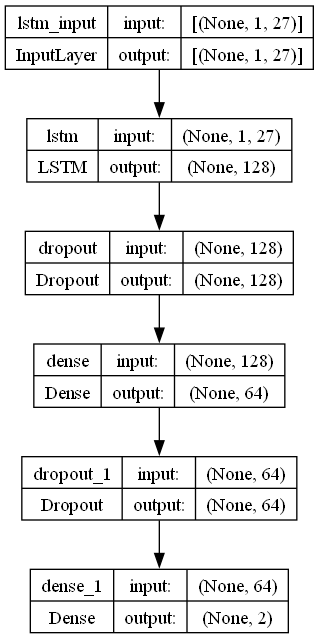

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)  

X_train_np = x_train.to_numpy()
y_encoded_np = np.array(y_encoded)

print(X_train_np.shape)

X_train_np = X_train_np.reshape(X_train_np.shape[0], 1, X_train_np.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(units=128, input_shape=(X_train_np.shape[1], X_train_np.shape[2])),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Plot the model architecture
plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)
